<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Replace the directory path with your desired directory
directory_path = '/content/drive/MyDrive/resized_drone_data'

# Get the list of files in the directory
file_list = os.listdir(directory_path)

# Print the number of files in the directory
num_files = len(file_list)
print(f'Number of files in {directory_path}: {num_files}')


Number of files in /content/drive/MyDrive/resized_drone_data: 0


In [ ]:
import os

# Replace the directory path with your desired directory
directory_path = '/content/drive/MyDrive/drone_data'

# Get the list of files in the directory
file_list = os.listdir(directory_path)

# Print the number of files in the directory
num_files = len(file_list)
print(f'Number of files in {directory_path}: {num_files}')


Number of files in /content/drive/MyDrive/drone_data: 8140


Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/drone_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_drone_data"

In [ ]:
import os
import cv2
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have GPU support enabled.")

data_dir = "/content/drive/MyDrive/drone_data"
output_dir = "/content/drive/MyDrive/my_drone_data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Create a report file
report_path = os.path.join(output_dir, "report.txt")
with open(report_path, "w") as report_file:
    report_file.write("Processed Images Report:\n\n")

    # Iterate through each image file in the specified directory
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".jpg") or file_name.endswith(".txt"):
            # Read the image
            img_path = os.path.join(data_dir, file_name)

            # Add error handling for image reading
            image = cv2.imread(img_path)
            if image is None:
                report_file.write(f"Error reading image: {img_path}\n")
                continue

            # Read the corresponding annotation file
            annotation_path = os.path.join(data_dir, file_name.replace(".jpg", ".txt"))
            with open(annotation_path, "r") as f:
                # Read the line and split it into five values
                class_label, x_center, y_center, width, height = [float(coord) for coord in f.readline().split()]

            # Convert to YOLO format (xmin, ymin, xmax, ymax)
            xmin = int((x_center - width / 2) * image.shape[1])
            ymin = int((y_center - height / 2) * image.shape[0])
            xmax = int((x_center + width / 2) * image.shape[1])
            ymax = int((y_center + height / 2) * image.shape[0])

            # Crop the drone from the image
            drone_crop = image[ymin:ymax, xmin:xmax]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, file_name.replace(".jpg", "_drone.jpg"))
            cv2.imwrite(output_path, drone_crop)

            # Write information to the report file
            report_file.write(f"Processed: {file_name} -> {output_path}\n")

print("Processing complete. Report generated at:", report_path)


GPU device found: /device:GPU:0
Processing complete. Report generated at: /content/drive/MyDrive/my_drone_data/report.txt


Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/bird_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_bird_data"

In [ ]:
import os
import cv2
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have GPU support enabled.")

data_dir = "/content/drive/MyDrive/bird_data"
output_dir = "/content/drive/MyDrive/my_bird_data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Create a report file
report_path = os.path.join(output_dir, "report.txt")
with open(report_path, "w") as report_file:
    report_file.write("Processed Images Report:\n\n")

    # Iterate through each image file in the specified directory
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".jpg") or file_name.endswith(".txt"):
            # Read the image
            img_path = os.path.join(data_dir, file_name)

            # Add error handling for image reading
            image = cv2.imread(img_path)
            if image is None:
                report_file.write(f"Error reading image: {img_path}\n")
                continue

            # Read the corresponding annotation file
            annotation_path = os.path.join(data_dir, file_name.replace(".jpg", ".txt"))
            with open(annotation_path, "r") as f:
                # Read the line and split it into five values
                class_label, x_center, y_center, width, height = [float(coord) for coord in f.readline().split()]

            # Convert to YOLO format (xmin, ymin, xmax, ymax)
            xmin = int((x_center - width / 2) * image.shape[1])
            ymin = int((y_center - height / 2) * image.shape[0])
            xmax = int((x_center + width / 2) * image.shape[1])
            ymax = int((y_center + height / 2) * image.shape[0])

            # Crop the drone from the image
            drone_crop = image[ymin:ymax, xmin:xmax]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, file_name.replace(".jpg", "_drone.jpg"))
            cv2.imwrite(output_path, drone_crop)

            # Write information to the report file
            report_file.write(f"Processed: {file_name} -> {output_path}\n")

print("Processing complete. Report generated at:", report_path)


GPU device found: /device:GPU:0
Processing complete. Report generated at: /content/drive/MyDrive/my_bird_data/report.txt


RESIZE to 32x32 the images in the files /content/drive/MyDrive/my_bird_data
/content/drive/MyDrive/my_drone_data

In [ ]:
import os
import cv2
from tqdm import tqdm

# Paths to the directories containing the images
bird_data_path = "/content/drive/MyDrive/my_bird_data"
drone_data_path = "/content/drive/MyDrive/my_drone_data"

# Path to save the resized images
resized_bird_data_path = "/content/drive/MyDrive/resized_bird_data"
resized_drone_data_path = "/content/drive/MyDrive/resized_drone_data"

# Ensure the output directories exist
os.makedirs(resized_bird_data_path, exist_ok=True)
os.makedirs(resized_drone_data_path, exist_ok=True)

# Function to resize images to 32x32
def resize_image(image_path, output_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (32, 32))
    cv2.imwrite(output_path, resized_img)

# Resize images in the bird data directory
for filename in tqdm(os.listdir(bird_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(bird_data_path, filename)
        output_path = os.path.join(resized_bird_data_path, filename)
        resize_image(input_path, output_path)

# Resize images in the drone data directory
for filename in tqdm(os.listdir(drone_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(drone_data_path, filename)
        output_path = os.path.join(resized_drone_data_path, filename)
        resize_image(input_path, output_path)


100%|██████████| 4071/4071 [1:06:16<00:00,  1.02it/s] 


In [ ]:
import os
import cv2
from tqdm import tqdm

# Paths to the directories containing the images
drone_data_path = "/content/drive/MyDrive/my_drone_data"

# Path to save the resized images
resized_drone_data_path = "/content/drive/MyDrive/resized_drone_data"

# Ensure the output directories exist
os.makedirs(resized_drone_data_path, exist_ok=True)

# Function to resize images to 32x32
def resize_image(image_path, output_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (32, 32))
    cv2.imwrite(output_path, resized_img)


# Resize images in the drone data directory
for filename in tqdm(os.listdir(drone_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(drone_data_path, filename)
        output_path = os.path.join(resized_drone_data_path, filename)
        resize_image(input_path, output_path)


100%|██████████| 4071/4071 [03:18<00:00, 20.51it/s] 


In [ ]:
# !rm -rf /content/drive/MyDrive/my_drone_data


crop a random 32x32 part of each image.
Save processed images and labels.
input_folder = '/content/drive/MyDrive/drone_data'
output_folder = '/content/drive/MyDrive/other_data'.
use GPU

In [ ]:
import os
import random
import cv2
import torch
from torchvision import transforms

# Set the paths
input_folder = '/content/drive/MyDrive/drone_data'
output_folder = '/content/drive/MyDrive/other_data'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to crop a random 32x32 part of an image
def crop_random_32x32(image):
    height, width, _ = image.shape
    top = random.randint(0, height - 32)
    left = random.randint(0, width - 32)
    cropped_image = image[top:top + 32, left:left + 32, :]
    return cropped_image, top, left

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Crop a random 32x32 part of the image
        cropped_image, top, left = crop_random_32x32(image)

        # Save the processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cropped_image)

        # Save the label information (filename and random crop coordinates)
        label_file_path = os.path.join(output_folder, 'labels.txt')
        with open(label_file_path, 'a') as label_file:
            label_file.write(f"{filename} {top} {left}\n")

print(f"Random 32x32 crops of images have been saved in {output_folder}.")


The same with bird_data


In [ ]:
import os
import random
import cv2
import torch
from torchvision import transforms

# Set the paths
input_folder = '/content/drive/MyDrive/bird_data'
output_folder = '/content/drive/MyDrive/other_data'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to crop a random 32x32 part of an image
def crop_random_32x32(image):
    height, width, _ = image.shape
    top = random.randint(0, height - 32)
    left = random.randint(0, width - 32)
    cropped_image = image[top:top + 32, left:left + 32, :]
    return cropped_image, top, left

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Crop a random 32x32 part of the image
        cropped_image, top, left = crop_random_32x32(image)

        # Save the processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cropped_image)

        # Save the label information (filename and random crop coordinates)
        label_file_path = os.path.join(output_folder, 'labels.txt')
        with open(label_file_path, 'a') as label_file:
            label_file.write(f"{filename} {top} {left}\n")

print(f"Random 32x32 crops of images have been saved in {output_folder}.")


Random 32x32 crops of images have been saved in /content/drive/MyDrive/other_data.


take the first 9 images from "/content/drive/MyDrive/drone_data" and use the augmentation function of Keras and print new images

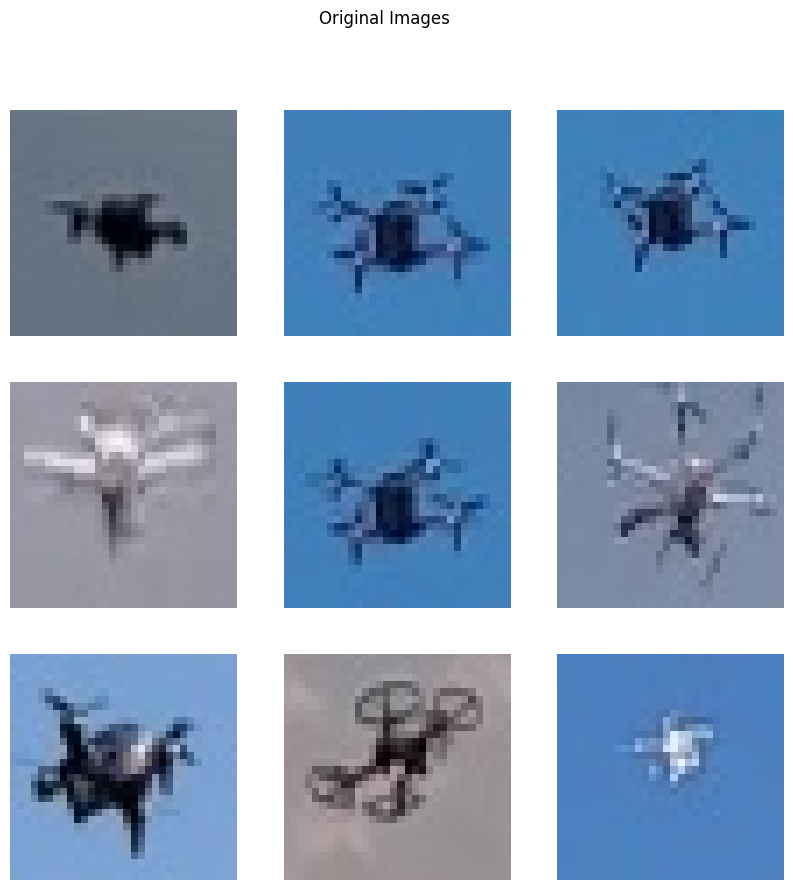

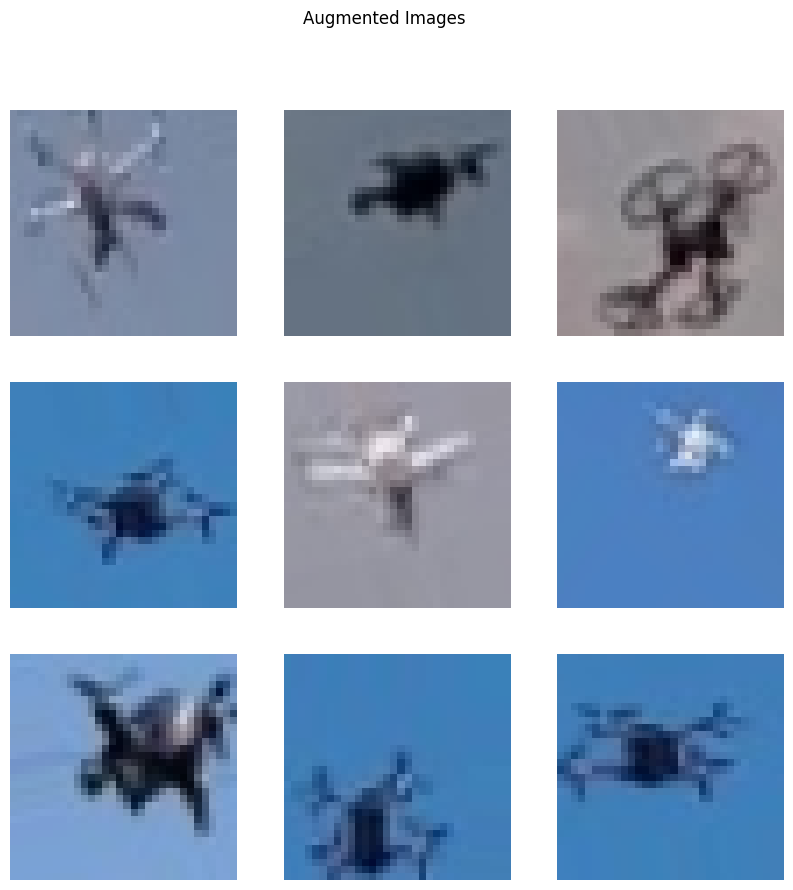

In [6]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the path to the input folder
input_folder = '/content/drive/MyDrive/resized_drone_data'

# Function to load and preprocess an image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    return image

# Load the first 9 images
image_list = []
for filename in os.listdir(input_folder)[:9]:
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = load_image(image_path)
        image_list.append(image)

# Convert the list to a numpy array
images = np.array(image_list)

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Plot the original images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

# Generate augmented images and plot them
augmented_images = datagen.flow(images, batch_size=9)
augmented_images = next(augmented_images)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()


count and print how many files in the folder

In [21]:
import os

folder_path = "/content/drive/MyDrive/resized_bird_data"

# List all files in the folder
files = os.listdir(folder_path)

# Filter only files with specific extensions (e.g., '.jpg', '.png')
image_files = [file for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Get the total number of images
num_images = len(image_files)

print(f'The number of images in the folder {folder_path} is: {num_images}')


The number of images in the folder /content/drive/MyDrive/resized_bird_data is: 3011


# Data augmentation Section

senior python prog GPU. take the  images from "/content/drive/MyDrive/resized_drone_data" and use  augmentation functions of Keras, for every image take one random augmantation function a make a new image in a folder name "my_augmented_drone_data". use asembler instead of loops. Then after finished take 10  random exemples of an original and his new augmanted image

In [26]:
import os
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Set the path to the original images and the destination folder for augmented images
original_images_path = "/content/drive/MyDrive/resized_drone_data"
augmented_images_path = "/content/drive/MyDrive/my_augmented_drone_data"

# Create the destination folder if it doesn't exist
os.makedirs(augmented_images_path, exist_ok=True)

# List all the original image files
original_image_files = glob(os.path.join(original_images_path, "*.jpg"))

# Define image data generator with random augmentation functions
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply random augmentation to an image
def augment_image(image_path):
    img = keras.preprocessing.image.load_img(image_path)
    x = keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_images_path, save_prefix='aug', save_format='jpg'):
        i += 1
        if i >= 1:  # Number of augmentations per image
            break

# Apply augmentation to all original images
[ augment_image(image_path) for image_path in original_image_files ]

# Function to select and display 10 random pairs of original and augmented images
def display_random_pairs(original_files, augmented_files, num_pairs=10):
    random_pairs = random.sample(list(zip(original_files, augmented_files)), num_pairs)
    for original, augmented in random_pairs:
        print(f"Original: {original}, Augmented: {augmented}")

# List all augmented image files
augmented_image_files = glob(os.path.join(augmented_images_path, "*.jpg"))

# Display 10 random pairs of original and augmented images
display_random_pairs(original_image_files, augmented_image_files)


Original: /content/drive/MyDrive/resized_drone_data/video13184_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_2853.jpg
Original: /content/drive/MyDrive/resized_drone_data/DJI_FPV_Sunny (846)_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_9256.jpg
Original: /content/drive/MyDrive/resized_drone_data/DJI_FPV_Evening (566)_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_3397.jpg
Original: /content/drive/MyDrive/resized_drone_data/Dji_pantom_Sunny (141)_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_5015.jpg
Original: /content/drive/MyDrive/resized_drone_data/video18_1062_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_224.jpg
Original: /content/drive/MyDrive/resized_drone_data/DJI_FPV_Sunny (701)_drone.jpg, Augmented: /content/drive/MyDrive/my_augmented_drone_data/aug_0_9522.jpg
Original: /content/drive/MyDrive/resized_drone_data/video16_379_drone.jpg, A

please display in pairs: the original image and augmented.

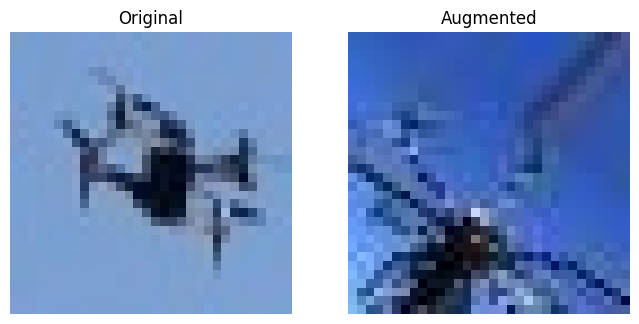

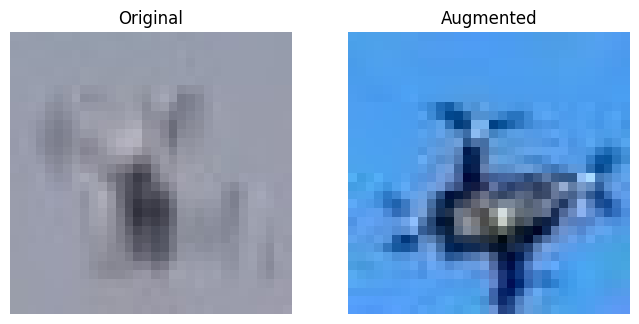

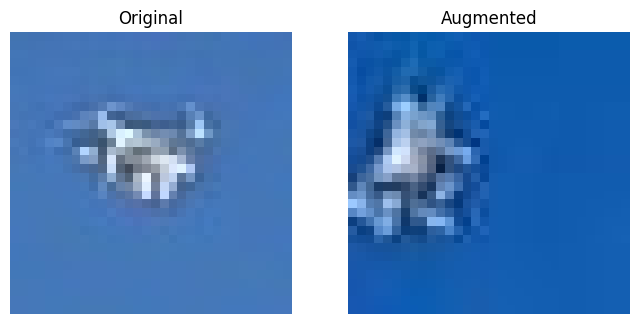

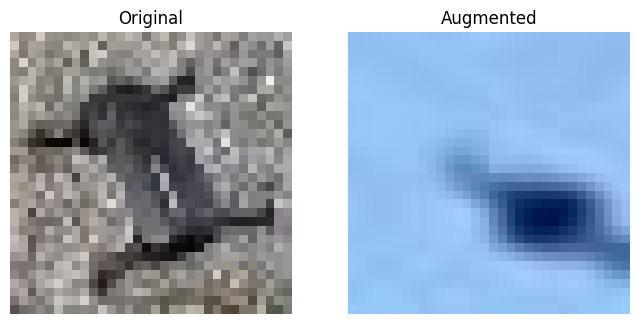

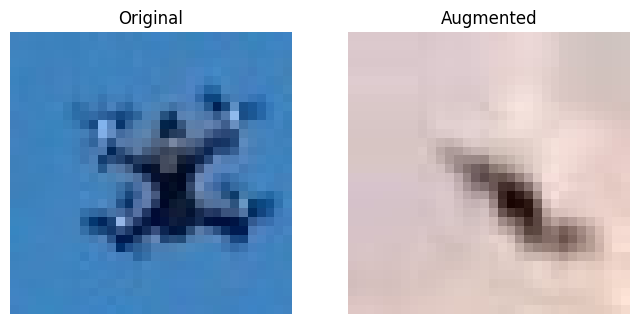

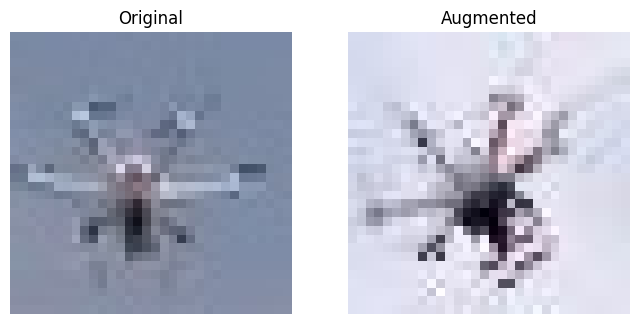

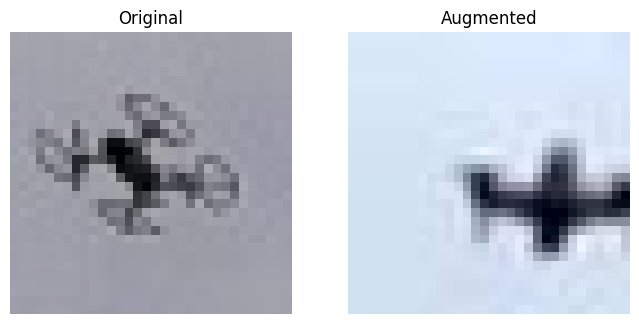

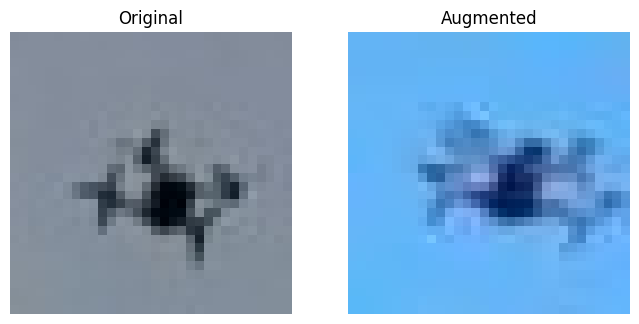

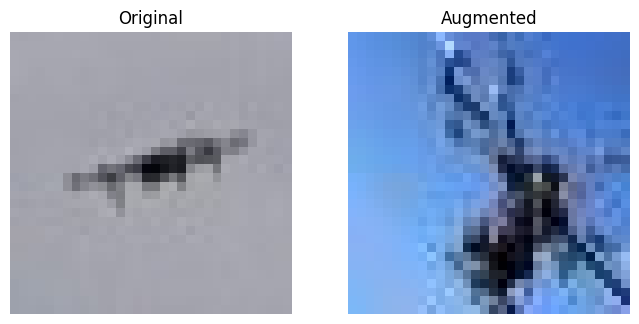

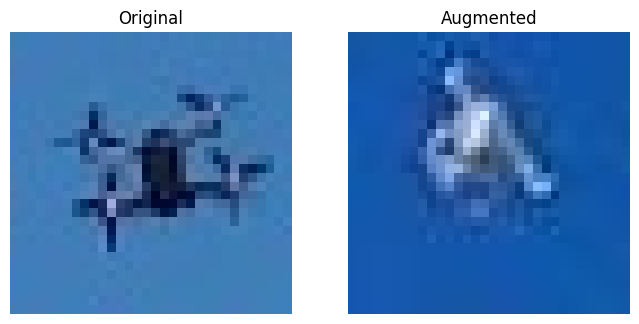

In [27]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Set the path to the original images and the destination folder for augmented images
original_images_path = "/content/drive/MyDrive/resized_drone_data"
augmented_images_path = "/content/drive/MyDrive/my_augmented_drone_data"

# Create the destination folder if it doesn't exist
os.makedirs(augmented_images_path, exist_ok=True)

# List all the original image files
original_image_files = glob(os.path.join(original_images_path, "*.jpg"))

# Define image data generator with random augmentation functions
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply random augmentation to an image
def augment_image(image_path):
    img = keras.preprocessing.image.load_img(image_path)
    x = keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_images_path, save_prefix='aug', save_format='jpg'):
        i += 1
        if i >= 1:  # Number of augmentations per image
            break

# Apply augmentation to all original images
[ augment_image(image_path) for image_path in original_image_files ]

# List all augmented image files
augmented_image_files = glob(os.path.join(augmented_images_path, "*.jpg"))

# Function to display original and augmented image pairs
def display_image_pairs(original_file, augmented_file):
    original_img = keras.preprocessing.image.load_img(original_file)
    augmented_img = keras.preprocessing.image.load_img(augmented_file)

    plt.figure(figsize=(8, 4))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title('Original')

    # Display augmented image
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.title('Augmented')

    plt.show()

# Display 10 random pairs of original and augmented images
for _ in range(10):
    random_index = random.randint(0, len(original_image_files) - 1)
    original_file = original_image_files[random_index]
    augmented_file = augmented_image_files[random_index]
    display_image_pairs(original_file, augmented_file)


take this 2 scripts and put in one.
use it to modify resized_bird_data

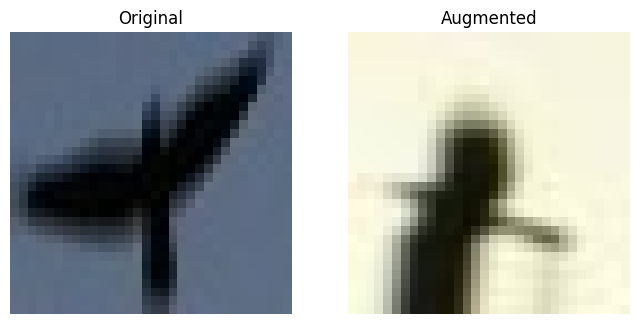

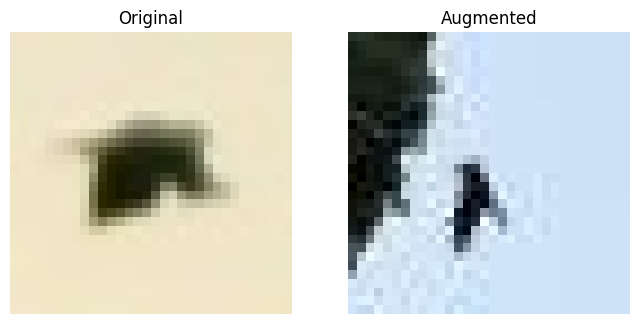

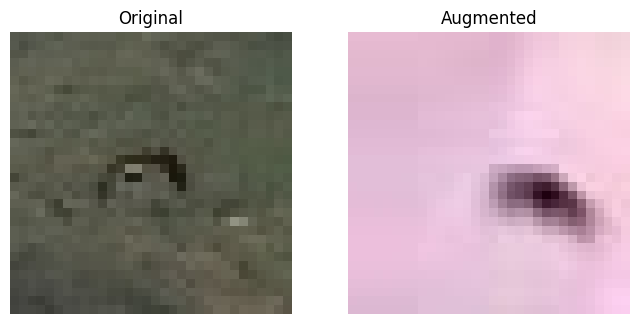

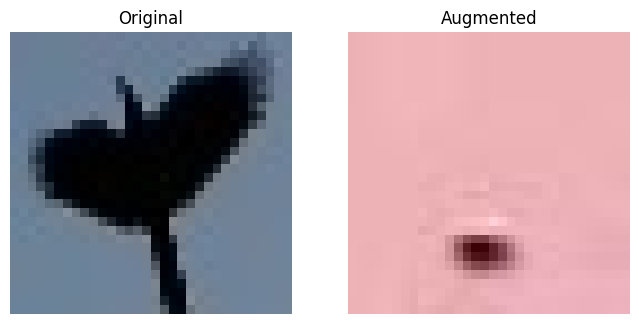

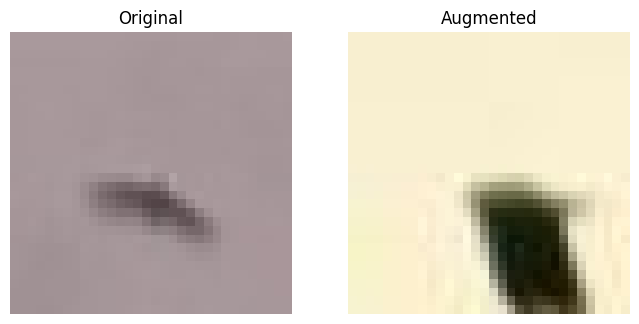

IndexError: ignored

In [32]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Set the path to the original images and the destination folder for augmented images
original_images_path = "/content/drive/MyDrive/resized_bird_data"
augmented_images_path = "/content/drive/MyDrive/my_augmented_bird_data"

# Create the destination folder if it doesn't exist
os.makedirs(augmented_images_path, exist_ok=True)

# List all the original image files
original_image_files = glob(os.path.join(original_images_path, "*.jpg"))

# Define image data generator with random augmentation functions
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply random augmentation to an image
def augment_image(image_path):
    img = keras.preprocessing.image.load_img(image_path)
    x = keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_images_path, save_prefix='aug', save_format='jpg'):
        i += 1
        if i >= 1:  # Number of augmentations per image
            break

# Apply augmentation to all original images
[ augment_image(image_path) for image_path in original_image_files ]

# List all augmented image files
augmented_image_files = glob(os.path.join(augmented_images_path, "*.jpg"))

# Function to display original and augmented image pairs
def display_image_pairs(original_file, augmented_file):
    original_img = keras.preprocessing.image.load_img(original_file)
    augmented_img = keras.preprocessing.image.load_img(augmented_file)

    plt.figure(figsize=(8, 4))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title('Original')

    # Display augmented image
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.title('Augmented')

    plt.show()

# Display 10 random pairs of original and augmented images
for _ in range(10):
    random_index = random.randint(0, len(original_image_files) - 1)
    original_file = original_image_files[random_index]
    augmented_file = augmented_image_files[random_index]
    display_image_pairs(original_file, augmented_file)


take this folders and print number of files :/content/drive/MyDrive/resized_bird_data, /content/drive/MyDrive/my_augmented_bird_data, /content/drive/MyDrive/resized_drone_data, /content/drive/MyDrive/my_augmented_drone_data

In [33]:
import os

folders = [
    '/content/drive/MyDrive/resized_bird_data',
    '/content/drive/MyDrive/my_augmented_bird_data',
    '/content/drive/MyDrive/resized_drone_data',
    '/content/drive/MyDrive/my_augmented_drone_data'
]

for folder in folders:
    try:
        file_count = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
        print(f"Number of files in {folder}: {file_count}")
    except FileNotFoundError:
        print(f"Folder not found: {folder}")
    except Exception as e:
        print(f"An error occurred while processing {folder}: {e}")


Number of files in /content/drive/MyDrive/resized_bird_data: 3011
Number of files in /content/drive/MyDrive/my_augmented_bird_data: 2609
Number of files in /content/drive/MyDrive/resized_drone_data: 4070
Number of files in /content/drive/MyDrive/my_augmented_drone_data: 5524


In [34]:
!rm -rf /content/drive/MyDrive/tensorFlow_Datasets/Test



In [35]:
!rm -rf /content/drive/MyDrive/tensorFlow_Datasets/Train

Preparing all data sets into Yolo Format

In [20]:
import os
import random
import tensorflow as tf
from shutil import copyfile

# Set the paths
source_folder = "/content/drive/MyDrive/resized_drone_data"
train_folder = "/content/drive/MyDrive/tensorFlow_Datasets/train/drone"
test_folder = "/content/drive/MyDrive/tensorFlow_Datasets/test/drone"

# Create destination folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list for random selection
random.shuffle(image_files)

# Calculate the split index
split_index = int(0.85 * len(image_files))

# Divide the list into training and test sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Function to copy files using TensorFlow
def copy_files(src, dst):
    tf.io.gfile.copy(os.path.join(source_folder, src), os.path.join(dst, src))

# Copy files to the training folder
for file in train_files:
    copy_files(file, train_folder)

# Copy files to the test folder
for file in test_files:
    copy_files(file, test_folder)


In [21]:
import os
import random
import tensorflow as tf
from shutil import copyfile

# Set the paths
source_folder = "/content/drive/MyDrive/resized_bird_data"
train_folder = "/content/drive/MyDrive/tensorFlow_Datasets/train/bird"
test_folder = "/content/drive/MyDrive/tensorFlow_Datasets/test/bird"

# Create destination folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list for random selection
random.shuffle(image_files)

# Calculate the split index
split_index = int(0.85 * len(image_files))

# Divide the list into training and test sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Function to copy files using TensorFlow
def copy_files(src, dst):
    tf.io.gfile.copy(os.path.join(source_folder, src), os.path.join(dst, src))

# Copy files to the training folder
for file in train_files:
    copy_files(file, train_folder)

# Copy files to the test folder
for file in test_files:
    copy_files(file, test_folder)


In [22]:
import os
import random
import tensorflow as tf
from shutil import copyfile

# Set the paths
source_folder = "/content/drive/MyDrive/other_data"
train_folder = "/content/drive/MyDrive/tensorFlow_Datasets/train/other"
test_folder = "/content/drive/MyDrive/tensorFlow_Datasets/test/other"

# Create destination folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list for random selection
random.shuffle(image_files)

# Calculate the split index
split_index = int(0.85 * len(image_files))

# Divide the list into training and test sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Function to copy files using TensorFlow
def copy_files(src, dst):
    tf.io.gfile.copy(os.path.join(source_folder, src), os.path.join(dst, src))

# Copy files to the training folder
for file in train_files:
    copy_files(file, train_folder)

# Copy files to the test folder
for file in test_files:
    copy_files(file, test_folder)


In [23]:
import os
import random
import tensorflow as tf
from shutil import copyfile

# Set the paths
source_folder = "/content/drive/MyDrive/my_augmented_bird_data"
train_folder = "/content/drive/MyDrive/tensorFlow_Datasets/train/bird"
test_folder = "/content/drive/MyDrive/tensorFlow_Datasets/test/bird"

# Create destination folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list for random selection
random.shuffle(image_files)

# Calculate the split index
split_index = int(0.85 * len(image_files))

# Divide the list into training and test sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Function to copy files using TensorFlow
def copy_files(src, dst):
    tf.io.gfile.copy(os.path.join(source_folder, src), os.path.join(dst, src))

# Copy files to the training folder
for file in train_files:
    copy_files(file, train_folder)

# Copy files to the test folder
for file in test_files:
    copy_files(file, test_folder)


In [24]:
import os
import random
import tensorflow as tf
from shutil import copyfile

# Set the paths
source_folder = "/content/drive/MyDrive/my_augmented_drone_data"
train_folder = "/content/drive/MyDrive/tensorFlow_Datasets/train/drone"
test_folder = "/content/drive/MyDrive/tensorFlow_Datasets/test/drone"

# Create destination folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list for random selection
random.shuffle(image_files)

# Calculate the split index
split_index = int(0.85 * len(image_files))

# Divide the list into training and test sets
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# Function to copy files using TensorFlow
def copy_files(src, dst):
    tf.io.gfile.copy(os.path.join(source_folder, src), os.path.join(dst, src))

# Copy files to the training folder
for file in train_files:
    copy_files(file, train_folder)

# Copy files to the test folder
for file in test_files:
    copy_files(file, test_folder)


In [19]:
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


# Set the folder path
folder_path = '/content/drive/MyDrive/tensorFlow_Datasets/test/bird'

# Get a list of files in the folder
file_list = os.listdir(folder_path)

# Loop through the files and delete them
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    os.remove(file_path)

print(f"Files in {folder_path} have been deleted.")


Files in /content/drive/MyDrive/tensorFlow_Datasets/test/bird have been deleted.


#CNN Classifier Model

Write software as a Python senior at Google Collab, GPU Tensorflow, We will write a neural network that will detect whether there is a drone, a bird or other thing in the picture,  three neurons in the final dense layer of your model. Take a dataset in YOLOv8 format size 32x32 from /content/drive/MyDrive/tensorFlow_Datasets. with the subfolders train: /content/drive/MyDrive/tensorFlow_Datasets/train and test: /content/drive/MyDrive/tensorFlow_Datasets/test. Use 3D Keras to build a CNN classifier Train the model and evaluate performance. Display the accuracy of the trained model on the test set. Visualize and do Analysis: Plot accuracy and loss graphs Plot a confusion matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
614/614 [==============================] - 32s 51ms/step - loss: 0.3556 - accuracy: 0.8588 - val_loss: 0.4444 - val_accuracy: 0.8586
Epoch 2/10
614/614 [==============================] - 33s 54ms/step - loss: 0.1890 - accuracy: 0.9355 - val_loss: 0.2042 - val_accuracy: 0.9319
Epoch 3/10
614/614 [==============================] - 29s 47ms/step - loss: 0.1420 - accuracy: 0.9538 - val_loss: 0.1461 - val_accuracy: 0.9495
Epoch 4/10
614/614 [==============================] - 31s 51ms/step - loss: 0.1176 - accuracy: 0.9608 - val_loss: 0.1799 - val_accuracy: 0.9403
Epoch 5/10
614/614 [==============================] - 31s 50ms/step - loss: 0.1043 - accuracy: 0.9658 - val_loss: 0.1032 - val_accuracy: 0.9668
Epoch 6/10
614/614 [==============================] - 30s 49ms/step - loss: 0.0866 - accuracy: 0.9704 - val_loss: 0.1425 - val_accuracy: 0.9512
Epoch 7

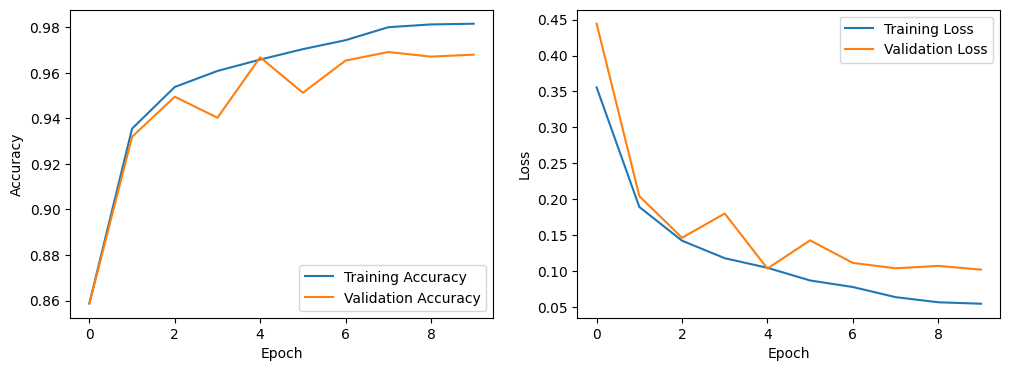

109/109 [==============================] - 2s 14ms/step


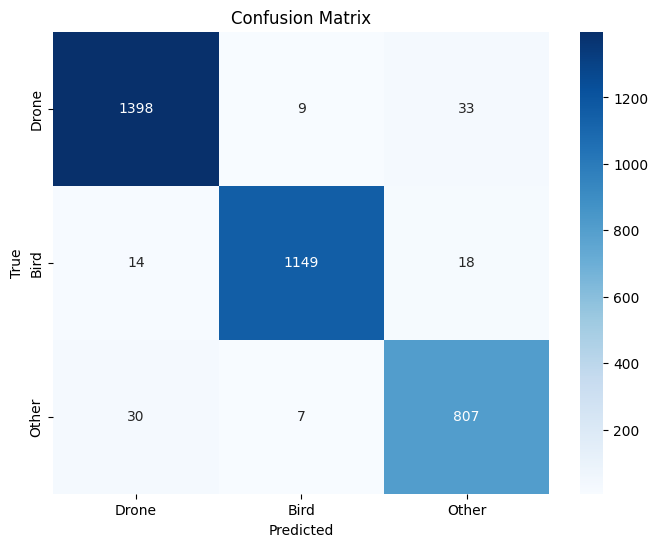

In [4]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for the train and test datasets
train_path = '/content/drive/MyDrive/tensorFlow_Datasets/train'
test_path = '/content/drive/MyDrive/tensorFlow_Datasets/test'

# Function to load YOLOv8 dataset
def load_dataset(path):
    images = []
    labels = []
    classes = os.listdir(path)

    for class_name in classes:
        class_path = os.path.join(path, class_name)
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(classes.index(class_name))

    return np.array(images), np.array(labels)

# Load train and test datasets
X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

# Adjust label values to start from 0 and replace negative labels with 0
y_train = np.clip(y_train - 1, 0, None)
y_test = np.clip(y_test - 1, 0, None)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build the CNN model using 3D Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Visualize confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Drone', 'Bird', 'Other'], yticklabels=['Drone', 'Bird', 'Other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
614/614 [==============================] - 32s 51ms/step - loss: 0.3556 - accuracy: 0.8588 - val_loss: 0.4444 - val_accuracy: 0.8586
Epoch 2/10
614/614 [==============================] - 33s 54ms/step - loss: 0.1890 - accuracy: 0.9355 - val_loss: 0.2042 - val_accuracy: 0.9319
Epoch 3/10
614/614 [==============================] - 29s 47ms/step - loss: 0.1420 - accuracy: 0.9538 - val_loss: 0.1461 - val_accuracy: 0.9495
Epoch 4/10
614/614 [==============================] - 31s 51ms/step - loss: 0.1176 - accuracy: 0.9608 - val_loss: 0.1799 - val_accuracy: 0.9403
Epoch 5/10
614/614 [==============================] - 31s 50ms/step - loss: 0.1043 - accuracy: 0.9658 - val_loss: 0.1032 - val_accuracy: 0.9668
Epoch 6/10
614/614 [==============================] - 30s 49ms/step - loss: 0.0866 - accuracy: 0.9704 - val_loss: 0.1425 - val_accuracy: 0.9512
Epoch 7

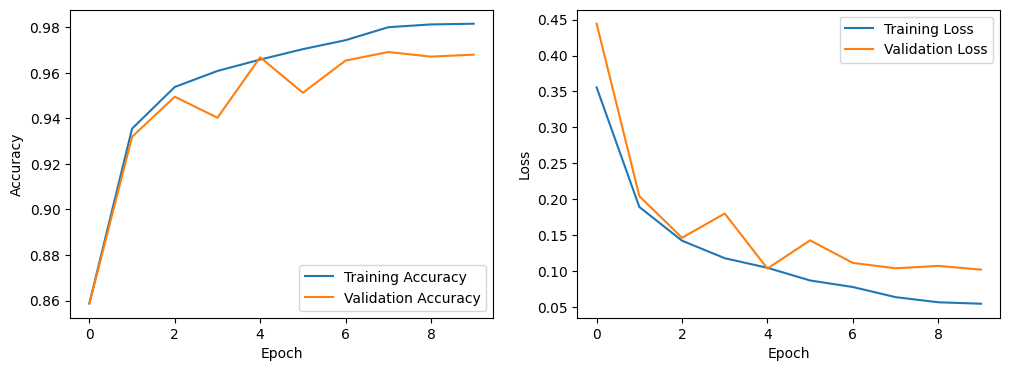

109/109 [==============================] - 2s 14ms/step


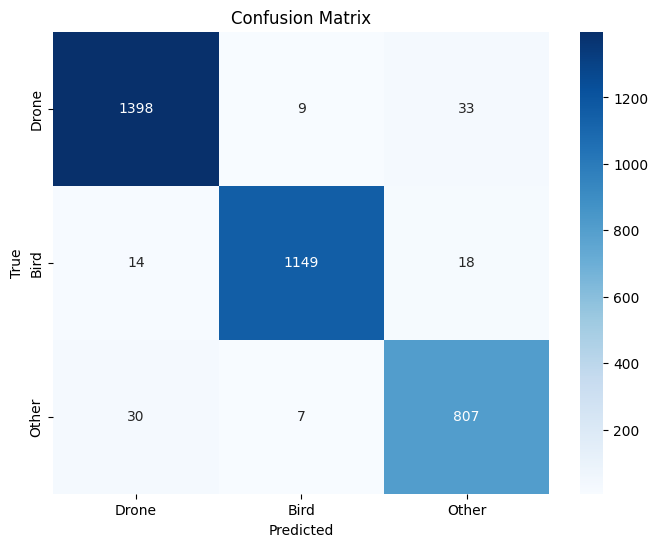

In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for the train and test datasets
train_path = '/content/drive/MyDrive/tensorFlow_Datasets/train'
test_path = '/content/drive/MyDrive/tensorFlow_Datasets/test'

# Function to load YOLOv8 dataset
def load_dataset(path):
    images = []
    labels = []
    classes = os.listdir(path)

    for class_name in classes:
        class_path = os.path.join(path, class_name)
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(classes.index(class_name))

    return np.array(images), np.array(labels)

# Load train and test datasets
X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

# Adjust label values to start from 0 and replace negative labels with 0
y_train = np.clip(y_train - 1, 0, None)
y_test = np.clip(y_test - 1, 0, None)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build the CNN model using 3D Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Visualize confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Drone', 'Bird', 'Other'], yticklabels=['Drone', 'Bird', 'Other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


how can we make this code work faster?

Epoch 1/5
614/614 [==============================] - 23s 37ms/step - loss: 0.4617 - accuracy: 0.8146 - val_loss: 0.3049 - val_accuracy: 0.8846
Epoch 2/5
614/614 [==============================] - 22s 35ms/step - loss: 0.2695 - accuracy: 0.9030 - val_loss: 0.2619 - val_accuracy: 0.9007
Epoch 3/5
614/614 [==============================] - 26s 42ms/step - loss: 0.2173 - accuracy: 0.9215 - val_loss: 0.2411 - val_accuracy: 0.9154
Epoch 4/5
614/614 [==============================] - 22s 35ms/step - loss: 0.1783 - accuracy: 0.9384 - val_loss: 0.2192 - val_accuracy: 0.9215
Epoch 5/5
109/109 [==============================] - 1s 12ms/step - loss: 0.1919 - accuracy: 0.9362
Test Accuracy: 0.936219334602356


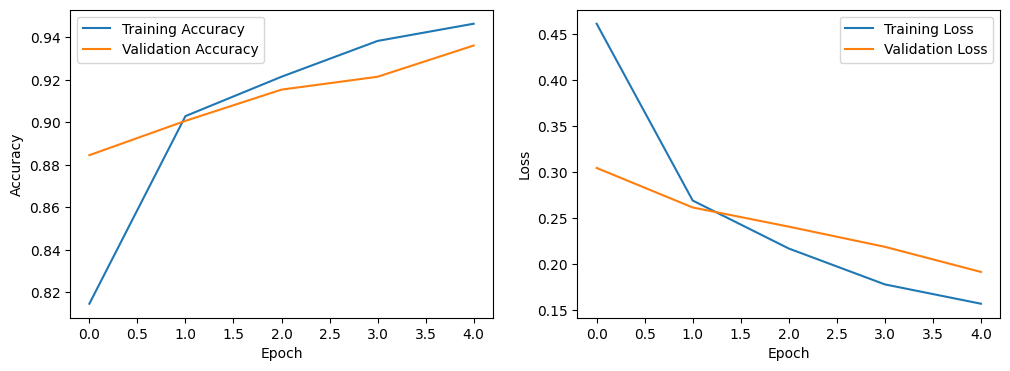

109/109 [==============================] - 2s 15ms/step


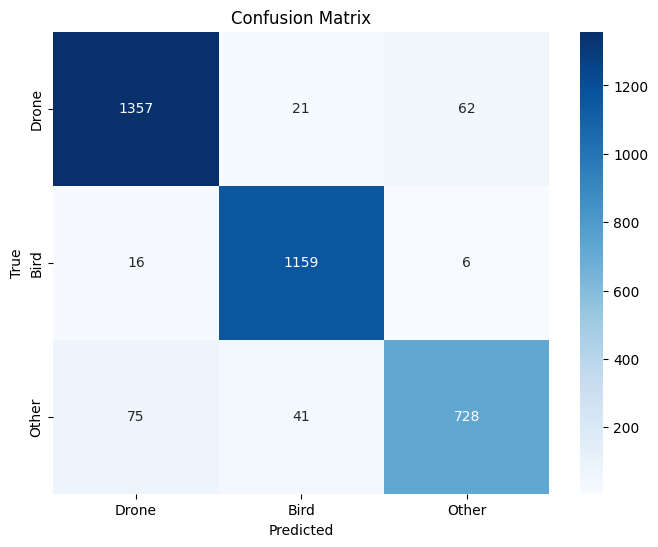

In [9]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for the train and test datasets
train_path = '/content/drive/MyDrive/tensorFlow_Datasets/train'
test_path = '/content/drive/MyDrive/tensorFlow_Datasets/test'

# Function to load YOLOv8 dataset
def load_dataset(path):
    images = []
    labels = []
    classes = os.listdir(path)

    for class_name in classes:
        class_path = os.path.join(path, class_name)
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(classes.index(class_name))

    return np.array(images), np.array(labels)

# Load train and test datasets
X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

# Adjust label values to start from 0 and replace negative labels with 0
y_train = np.clip(y_train - 1, 0, None)
y_test = np.clip(y_test - 1, 0, None)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build the CNN model using 3D Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))##########################################################
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Visualize confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Drone', 'Bird', 'Other'], yticklabels=['Drone', 'Bird', 'Other'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
